In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [212]:
heart_disease = pd.read_csv('heart-disease.csv')

In [213]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [214]:
X = heart_disease.drop(['target'],axis=1)

In [215]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [216]:
y = heart_disease['target']

In [217]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Splitting Data

In [218]:
#Split the data into training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [219]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [220]:
X.shape#303个样本

(303, 13)

In [221]:
X.shape[0]*0.8

242.4

In [222]:
car_sales = pd.read_csv('car-sales-extended.csv')

In [223]:
len(car_sales)

1000

In [224]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [225]:
# Split into X/y
X = car_sales.drop('Price',axis=1)
y = car_sales['Price']



In [226]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [227]:
# Build machine learning model
#试图预测一辆汽车的价格给出他的一些属性
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [228]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [229]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()#将变量设置为one hot，接下来导入热门编码器
transformer = ColumnTransformer([('One hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [230]:
pd.DataFrame(transformed_X)
#已经把它转换成了一个特定的one hot

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [231]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [232]:
# Fit the model
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                 y,
                                                 test_size= 0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [233]:
model.score(X_test,y_test)

0.3235867221569877

### missing values

1. fill them with some values(also known as imputation).
2. Remove the samples with missing data altogether.


In [234]:
# Import car sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [235]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [236]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [237]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing['Price']

In [238]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()#将变量设置为one hot，接下来导入热门编码器
transformer = ColumnTransformer([('One hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [239]:

# convet our data into numbers


In [240]:
car_sales_missing.Doors.value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

### fill missing with Pandas

In [241]:
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

car_sales_missing['Doors'].fillna(4,inplace=True)

/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_24514/1355527406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing',inplace=True)
/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_24514/1355527406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [242]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [243]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [244]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [245]:
len(car_sales_missing)

950

In [246]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [247]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()#将变量设置为one hot，接下来导入热门编码器
transformer = ColumnTransformer([('One hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Fill missing values with sklearn

In [248]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [249]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [250]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [251]:
# SPlit into X and y
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing["Price"]

In [252]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [253]:
# Fill missing value with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# FIll categorical values with missing & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (somthing that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features),
                            ('door_imputer', door_imputer, door_features),
                            ('num_imputer', num_imputer, num_features)])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [254]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [255]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [256]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()#将变量设置为one hot，接下来导入热门编码器
transformer = ColumnTransformer([('One hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [257]:
# Now we have got our data as numbers and filled (no missing values)
# let's fit a model
np.arange(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                y,
                                                test_size = 0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.10486008486143839

In [258]:
len(car_sales_filled),len(car_sales)#样本数量少导致差一些

(950, 1000)

Note: The 50 less values in the transformed data is because we dropped the rows(50 total)
with missing values in the Price column

## 2. Choosing the right estimator/algorithm for your problem
Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

* Some things to note:

* Scikit-Learn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
* Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples).
* If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them.

If you start to apply different algorithms but they don't seem to be working (not performing as well as you'd like), that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

### 2.1 Picking a machine learning model for a regression problem
California Housing dataset

In [259]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [260]:
# Use feature to predict target
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [261]:
housing_df ['target'] = pd.Series(housing['target'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [262]:
housing_df['MedHousVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHousVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [263]:
housing_df = housing_df.drop('MedHousVal',axis = 1)

In [264]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [265]:
# Import algorithm
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop('target',axis =1)
y = housing_df['target'] # Median house price in 10000s

# Split into train and test setsd
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#  Instantiate and fit the model
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the model(on the test set)
model.score(X_test,y_test)

/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
 

0.5758549611440125

What if 'Ridge' didn't work or the score didn't fit our needs?
well, we could always try a different model...
How about we try an ensemble model(an ensemble is combination of smaller models to try
and make better)
Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html


In [266]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target',axis=1)
y = housing_df['target']

# Split into train and test sets
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size =0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model(on the test set)
model.score(X_test,y_test)

0.8059809073051385

# 2.2 Picking a machine learning model for a classification problem

In [267]:
heart_disease = pd.read_csv('heart-disease.csv')

In [268]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [269]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [270]:
# Import the LinearSVC estimator calss
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=100)
clf.fit(X_train,y_train)

#Evaluate the LinearSVC
clf.score(X_test,y_test)

0.8688524590163934

In [271]:
heart_disease['target'].value_counts()
#只有两个类别

target
1    165
0    138
Name: count, dtype: int64

In [272]:
# Import the RandomForestClassifier estimator calss
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

#Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

## 3.Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [273]:
# Import the RandomForestClassifier estimator calss
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
# Fit the model to the data(training the machine learning model)
clf.fit(X_train,y_train)

#Evaluate the RandomForestClassifier(Use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

In [274]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [275]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 wats to make predictions:
* 1. predict()
* 2. predict_proba()

In [276]:
# Use a trained model to make predictions
clf.predict(np.array[1,7,8,3,4]) # This doesn't work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [277]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [278]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [279]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) #我们在这里计算的是accuracy，或者只是比较模型和这个np name之间的关系

np.float64(0.8524590163934426)

In [280]:
clf.score(X_test,y_test)#和上面完全一样

0.8524590163934426

In [281]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [282]:
# predict_proba() returns probability of a classification
clf.predict_proba(X_test[:5])#一个类不是心脏病，一个类是心脏病

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [283]:
# let's predict() on the same data
clf.predict(X_test[:5])
# 他是对相同的数据进行推测，但它不是只返回标签列，而是返回标签为真的概率

array([0, 1, 1, 0, 1])

In [284]:
X_test[:5]#在预测这五行，第一行他不是心脏病的概率是0.89,是的概率是0.11，加起来=1
#可以说模型对第一个样本非常有信心，很有信息第四个也不是心脏病，如果我们有两个以上的类，比如有十个标签，可以使用predict_proba()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [285]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Predict() can also be used for regression models.

In [286]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [287]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop('target',axis =1)
y = housing_df['target']
# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create model instance
model = RandomForestRegressor()

#Fit the model
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [288]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [289]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [290]:
len(y_test)

4128

In [291]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)
#每个模型的预测值都是0.32与实际预测值不同，可能有一些预测比这个值更大，也有可能小于此值，

0.3270458119670544

In [292]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4.Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
* 1. Estimator's built-in `score()` method
* 2. The `scoring` parameter
* 3. Problem-specific metric functions
 
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with score method

In [293]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [294]:
#The highest value for the .score() method is 1.0
clf.score(X_train,y_train)

1.0

In [295]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` on our regression problem

In [302]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=50)

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [303]:
# The default score() evaluation metric is r_squared for regression algorithms 
# Highest = 1.0 lowest = 0.0
model.score(X_test,y_test)

0.8036707379533463

In [304]:
y_test.mean()

np.float64(2.0550030959302323)

In [305]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

## 4.2 Evaluating a model unisng `scoring` parameter

In [315]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [316]:
clf.score(X_test,y_test)

0.8524590163934426

In [317]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [318]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [321]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

In [325]:
# Scoring parameter set to None by default, can be changed
cross_val_score(clf,X,y,cv=5,scoring=None)
#当scoring设置为none时，他将使用默认的评估指标对我们的classifier进行交叉验证

array([0.85245902, 0.8852459 , 0.80327869, 0.83333333, 0.75      ])

#4.2.1 Classification model evaluation metrics
* 1. Accuracy
  2. Area and under ROC curve
  3. confusion matrix
  4. classification report

### Accuracy

In [331]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf,X,y,cv=5)

In [332]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [333]:
print(f'Hear Disease Classifier Accuracy:{np.mean(cross_val_score)*100:2f}%')

Hear Disease Classifier Accuracy:82.480874%


### Area under receiver operating characteristic curve(AUC/ROC)
* Area under curve(AUC)
* ROC Curve

In [334]:
# Create X test
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [339]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:10],len(y_probs)
# Keep 

(array([[0.57, 0.43],
        [0.23, 0.77],
        [0.52, 0.48],
        [0.72, 0.28],
        [0.58, 0.42],
        [0.13, 0.87],
        [0.32, 0.68],
        [0.97, 0.03],
        [0.07, 0.93],
        [0.43, 0.57]]),
 61)

In [342]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.43, 0.77, 0.48, 0.28, 0.42, 0.87, 0.68, 0.03, 0.93, 0.57, 0.83,
       0.68, 1.  , 0.52, 0.76, 0.13, 0.84, 0.48, 0.1 , 0.07, 0.95, 0.7 ,
       1.  , 0.79, 0.09, 0.33, 0.88, 0.16, 0.72, 0.38, 0.14, 0.26, 0.22,
       0.49, 0.94, 0.94, 0.78, 0.84, 0.19, 0.98, 0.41, 0.82, 0.89, 0.27,
       0.  , 0.5 , 0.03, 0.85, 0.72, 0.32, 0.51, 0.23, 0.89, 0.31, 0.47,
       1.  , 0.68, 0.11, 0.97, 0.06, 0.05])

In [344]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.10344828, 0.10344828,
       0.10344828, 0.13793103, 0.17241379, 0.17241379, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.37931034,
       0.37931034, 0.4137931 , 0.4137931 , 0.44827586, 0.44827586,
       0.65517241, 0.65517241, 0.89655172, 0.96551724, 1.        ])

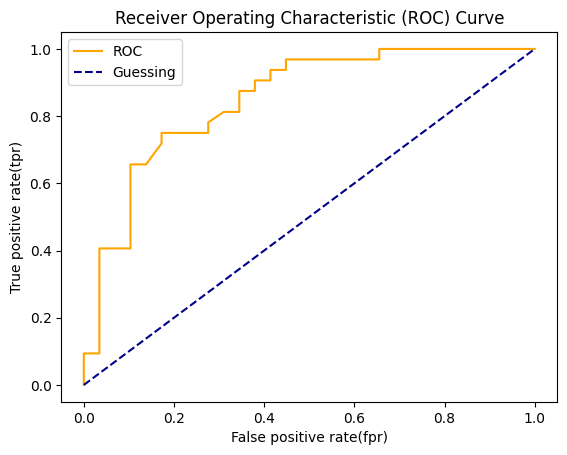

In [346]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr)of a m odel.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color='orange',label = 'ROC')
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color ='darkblue',linestyle = '--',label = 'Guessing')

    #Customize the plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [348]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

np.float64(0.849676724137931)

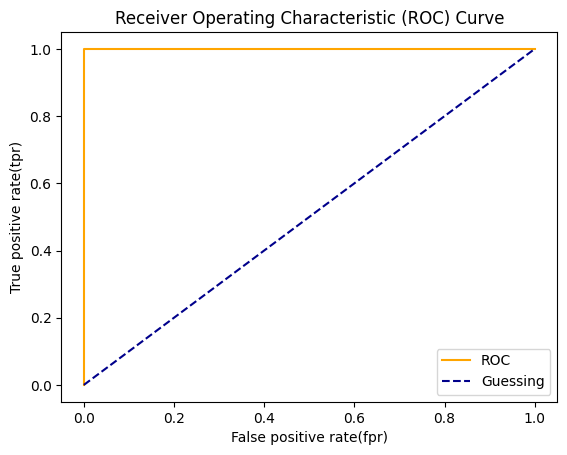

In [349]:
# Plot prefect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [350]:
# Prefect AUC score
roc_auc_score(y_test,y_test)

np.float64(1.0)

## Concusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In esseence, giving you an idea of where the model is getting confused.

In [351]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  7],
       [ 8, 24]])

In [355]:
# Visualize confusion matrix with pd.crossab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,22,7
1,8,24


<Axes: >

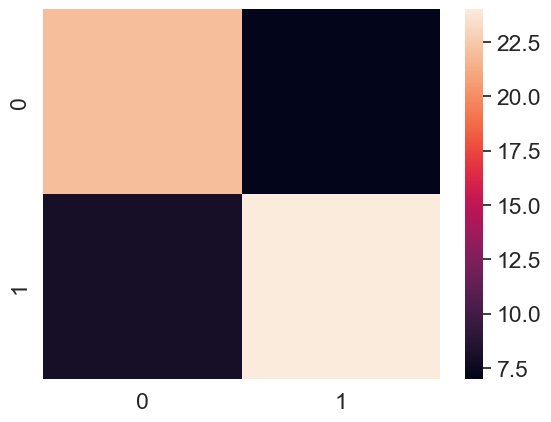

In [357]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

In [358]:
clf

RandomForestClassifier()

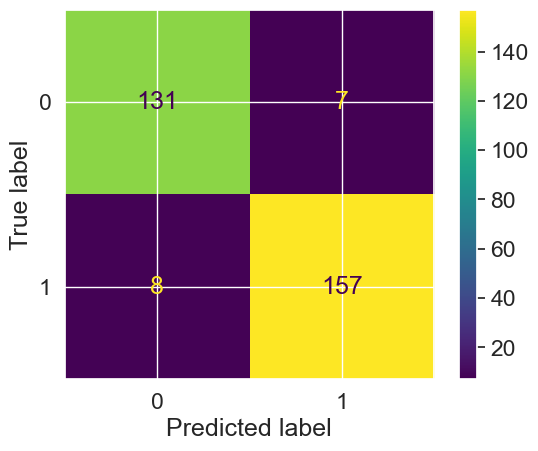

In [359]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

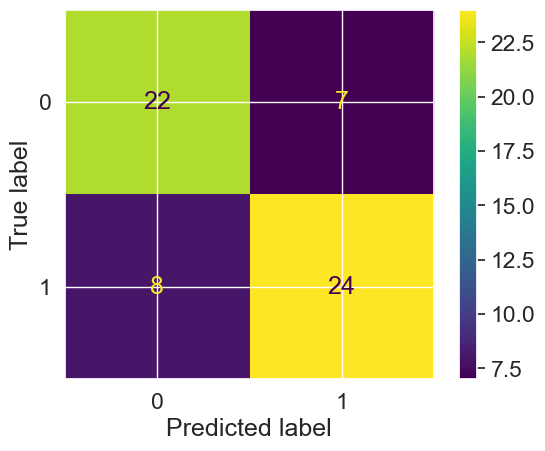

In [362]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

## Classification Report

In [364]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [370]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0


pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict =True))

/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we are going to cover are: 
* 1. R^2 (pronoucend r-squared) or coefficient of determination
  2. Mean absolute error(MAE)
  3. Mean squared error(MSE)



In [372]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target',axis =1) 
y = housing_df['target']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)


RandomForestRegressor()

In [374]:
model.score(X_test,y_test)

0.8059809073051385

In [375]:
y_test.mean()

np.float64(2.0550030959302323)

In [376]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [378]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [383]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [384]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

### Mean absolute error(MAE) **
MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong yhour models predictions are.

In [386]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3270458119670544

In [389]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds})
df['diffedences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,diffedences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [394]:
# MAE using formulas and differences
np.abs(df['diffedences']).mean()

np.float64(0.3270458119670544)

In [387]:
y_preds #这个等于mae加减y_test因为有绝对值所以为正

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

In [388]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

### Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values

In [395]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2542443610174998

In [399]:
df['squared_differences'] = np.square(df['diffedences'])
df.head()

,actual values,predicted values,diffedences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [400]:
# Calculate MSE by hand
squared =np.square(df['diffedences'])
squared.mean()

np.float64(0.2542443610174998)

In [405]:
df_large_error = df.copy()
df_large_error.iloc[0]['squared_differences'] = 16

/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_24514/4161693133.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]['squared_differences'] = 16


In [406]:
df_large_error.head()

,actual values,predicted values,diffedences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [408]:
# Calculate MSE with large error
df_large_error['squared_differences'].mean()

np.float64(0.25812028533523235)

In [409]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,diffedences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [410]:
df_large_error['squared_differences'].mean()

np.float64(0.7342642968470183)

### 4.2.3 Finally using the `scoring` parameter

In [414]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)


In [417]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring = None,estimator default scoring evaluation metrics 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [418]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [419]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [420]:
print(f'The cross-validated accuracy is:{np.mean(cv_precision)*100:.2f}%')

The cross-validated accuracy is:83.30%


In [421]:
#Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall
#非常接近

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [422]:
print(f'The cross-validated accuracy is:{np.mean(cv_recall)*100:.2f}%')

The cross-validated accuracy is:84.24%


Let's see the `scoring` parameter being using for a regression

In [423]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)

In [426]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3)#节省时间
np.mean(cv_r2)

np.float64(0.6538469004539024)

In [427]:
cv_r2

array([0.61899722, 0.72073286, 0.62181062])

In [432]:
# Mean squared error
cv_mse = cross_val_score(model,X,y,cv=3,scoring='neg_mean_squared_error')
np.mean(cv_mse)

np.float64(-0.46454074885133007)

In [434]:
cv_mse

array([-0.52035419, -0.33068351, -0.54258455])

In [433]:
#Mean absolute error
cv_mae = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

np.float64(-0.4811680513032946)

In [435]:
cv_mae

array([-0.51636343, -0.42407022, -0.5030705 ])

## 4.3 Using different evaluation metrics as sklearn functions

The 3rd way to evaluate sklearn machine learning model/estimators is to using the sklearn.metrics module

In [440]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X y
X = heart_disease.drop('target',axis =1)
y = heart_disease['target']
# Split model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create model
clf = RandomForestClassifier()
# Fit model
clf.fit(X_train,y_train)
# Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'Accurracy:{accuracy_score(y_test,clf.predict(X_test))*100:2f}%')

Classifier metrics on the test set
Accurracy:85.245902%


In [442]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X y
X = heart_disease.drop('target',axis =1)
y = heart_disease['target']
# Split model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create model
clf = RandomForestClassifier()
# Fit model
clf.fit(X_train,y_train)
# Make predictions
y_preds = clf.predict(X_test)
# Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'Accuracy:{accuracy_score(y_test,y_preds)*100:2f}%')
print(f'Precision:{precision_score(y_test,y_preds)*100:2f}%')
print(f'Recall:{recall_score(y_test,y_preds)*100:2f}%')
print(f'F1:{f1_score(y_test,y_preds)*100:2f}%')

Classifier metrics on the test set
Accuracy:85.245902%
Precision:84.848485%
Recall:87.500000%
F1:86.153846%


In [451]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X y
X = housing_df.drop('target',axis =1)
y = housing_df['target']
# Split model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create model
model = RandomForestRegressor()
# Fit model
model.fit(X_train,y_train)
# Make pridictions
y_preds = model.predict(X_test) 
# Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f'R2 score:{r2_score(y_test,y_preds)}')
print(f'MAE:{mean_absolute_error(y_test,y_preds)}')
print(f'MSE:{mean_squared_error(y_test,y_preds)}')

Regression metrics on the test set
R2 score:0.8075964554291417
MAE:0.3310341818313955
MSE:0.25781766390103633


### 5.Improving a model

First predictions = baseline predictions
first model = baseline model.

From a data perspective:
* Could we collect more data?(generally,the more data, the better)
* Could we improve our data?

From a model perspestive:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to(potentially) improve its ability to find patterns


Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [453]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [454]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

we're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [459]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)}
    print(f'ACC: {accuracy * 100:2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score:{f1:.2f}')

    return metric_dict

In [467]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data
X = heart_disease_shuffled.drop('target',axis =1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of the data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [468]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data
X = heart_disease_shuffled.drop('target',axis =1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of the data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

ACC: 82.222222%
Precision: 0.81
Recall: 0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [469]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classisifer
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

ACC: 80.000000%
Precision: 0.83
Recall: 0.80
F1 score:0.82


In [470]:
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_3.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [493]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]}

np.random.seed(42)

# Split the data
X = heart_disease_shuffled.drop('target',axis =1)
y = heart_disease_shuffled['target']

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=None)#这里如果-1就是全部值

# Setup RandomizedSearchCV,这里的cv就是cross validation 
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10, #number of models to try
                           cv=5,
                           verbose=2)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [494]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [495]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

ACC: 81.967213%
Precision: 0.77
Recall: 0.86
F1 score:0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [496]:
grid#540，加上cv就是2700

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [497]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['sqrt'],
          'min_samples_split': [ 6],
          'min_samples_leaf': [1, 2]}#根据前面的best缩小超参数搜索空间,这样一共60次

In [498]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

# Split the data
X = heart_disease_shuffled.drop('target',axis =1)
y = heart_disease_shuffled['target']

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)#这里如果-1就是全部值

# Setup GridSearchCV,这里的cv就是cross validation 
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [499]:
gs_clf.best_params_ #超参数越多，网格搜索时间越长

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [500]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

ACC: 81.967213%
Precision: 0.77
Recall: 0.86
F1 score:0.81


Let's compare our different model metrics

<Axes: >

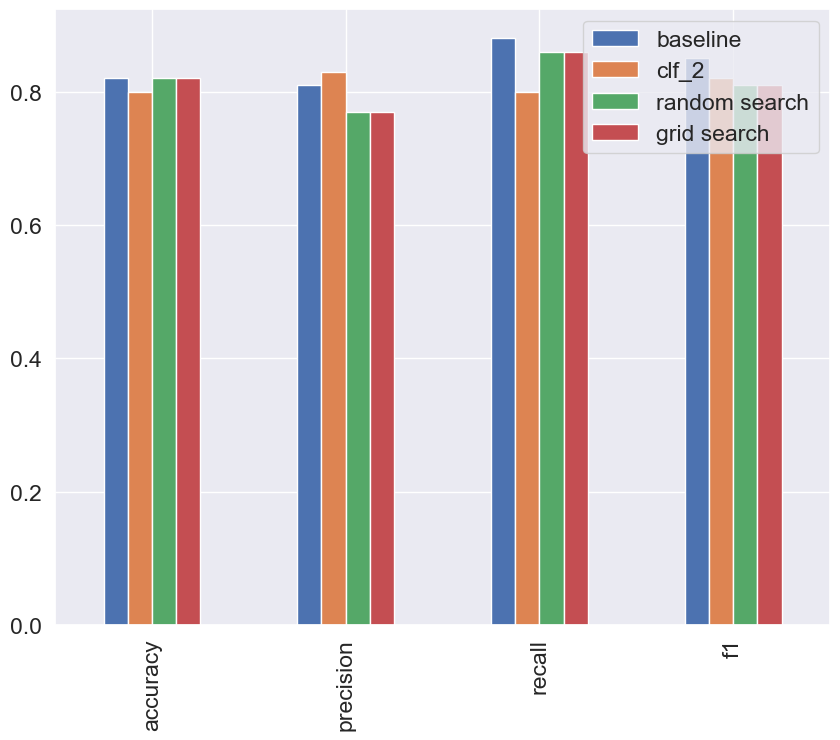

In [502]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                                'clf_2':clf_2_metrics,
                                'random search':rs_metrics,
                                'grid search':gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` model
2. with the `joblib` module

** Pickle **

In [503]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open('gs_random_random_forest_model_1.pkl','wb'))

In [504]:
# Load a saved model
loaded_pickle_model = pickle.load(open('gs_random_random_forest_model_1.pkl','rb'))

In [505]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

ACC: 81.967213%
Precision: 0.77
Recall: 0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## Joblib

In [506]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename = 'gs_random_random_forest_model_1.joblib')

['gs_random_random_forest_model_1.joblib']

In [509]:
# Import a saved joblib model
loaded_joblib_model = load(filename='gs_random_random_forest_model_1.joblib')

In [510]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

ACC: 81.967213%
Precision: 0.77
Recall: 0.86
F1 score:0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together!

In [511]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [512]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [513]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [519]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],inplace =True)

# Define different features and transformer pipeline
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

door_features = ['Doors']
door_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[('cat',categorical_transformer,
                                               categorical_features),
                                              ('door',door_tranformer,door_features),
                                              ('num',numeric_transformer,numeric_features
                                              )])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model', RandomForestRegressor())])

#Split the data
X = data.drop('Price',axis = 1)
y = data['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline

In [528]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['sqrt'],
    'model__min_samples_split':[2,4]
}     #双下划线访问我们的模型，希望访问步骤和上面的n_estimators是一样的

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [529]:
gs_model.score(X_test,y_test)

0.2848784564026805